In [1]:
# Importing Essential Libraries
import pandas as pd
import numpy as np
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
# Loading data Set
df = pd.read_csv('WP.csv', sep=';')
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,17.02.2000,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,11.05.2000,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,11.09.2000,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,13.12.2000,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,02.03.2001,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,06.10.2020,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,27.10.2020,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,03.12.2020,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,12.01.2021,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [3]:
# Basic Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2861 entries, 0 to 2860
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         2861 non-null   int64  
 1   date       2861 non-null   object 
 2   NH4        2858 non-null   float64
 3   BSK5       2860 non-null   float64
 4   Suspended  2845 non-null   float64
 5   O2         2858 non-null   float64
 6   NO3        2860 non-null   float64
 7   NO2        2858 non-null   float64
 8   SO4        2812 non-null   float64
 9   PO4        2833 non-null   float64
 10  CL         2812 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 246.0+ KB


In [4]:
df.shape

(2861, 11)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,2861.0,12.397064,6.084226,1.00,8.0000,14.000,16.00000,22.000
NH4,2858.0,0.758734,2.486247,0.00,0.0800,0.220,0.50000,39.427
BSK5,2860.0,4.316182,2.973997,0.00,2.1600,3.800,5.80000,50.900
Suspended,2845.0,12.931905,16.543097,0.00,6.0000,10.000,15.00000,595.000
O2,2858.0,9.508902,4.428260,0.00,7.0925,8.995,11.52000,90.000
NO3,2860.0,4.316846,6.881188,0.00,1.3900,2.800,5.58250,133.400
NO2,2858.0,0.246128,2.182777,0.00,0.0300,0.059,0.12575,109.000
SO4,2812.0,59.362313,96.582641,0.00,27.0525,37.800,64.64000,3573.400
PO4,2833.0,0.418626,0.771326,0.00,0.1300,0.270,0.47000,13.879
CL,2812.0,93.731991,394.512184,0.02,26.8000,33.900,45.60750,5615.280


In [6]:
df.isnull().sum()

id            0
date          0
NH4           3
BSK5          1
Suspended    16
O2            3
NO3           1
NO2           3
SO4          49
PO4          28
CL           49
dtype: int64

In [7]:
print(df.columns)

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL'],
      dtype='object')


In [8]:
# Convert Date Column to DateTime Format
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y')
df


,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00
...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49


In [9]:
# Sorting the Dataset by parameters - id , date
df = df.sort_values(by=['id','date'])
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0


In [10]:
# Extraction of year and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

In [11]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [12]:
df.columns

Index(['id', 'date', 'NH4', 'BSK5', 'Suspended', 'O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL', 'year', 'month'],
      dtype='object')

In [13]:
# Pollutants to Predict
pollutants = ['O2', 'NO3', 'NO2', 'SO4',
       'PO4', 'CL']

In [14]:
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [15]:
# Validating the Pollutant Columns
missing_cols = [col for col in pollutants if col not in df.columns]
if missing_cols:
    print("Missing pollutant columns:", missing_cols)
else:
    print("All pollutant columns found.")

All pollutant columns found.


In [16]:
df

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.00,0.454,289.50,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.00,0.090,1792.00,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.00,0.200,2509.00,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.20,0.377,1264.00,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.60,0.134,1462.00,2001,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2856,22,2020-10-06,0.046,2.69,3.6,8.28,3.80,0.038,160.00,0.726,77.85,2020,10
2857,22,2020-10-27,0.000,1.52,0.5,11.26,0.56,0.031,147.20,0.634,71.95,2020,10
2858,22,2020-12-03,0.034,0.29,0.8,11.09,2.58,0.042,209.92,0.484,61.17,2020,12
2859,22,2021-01-12,0.000,2.10,0.0,14.31,3.94,0.034,121.60,0.424,63.49,2021,1


In [17]:
# Dropping missing values - dropna()
df = df.dropna(subset = pollutants)
df.head()

,id,date,NH4,BSK5,Suspended,O2,NO3,NO2,SO4,PO4,CL,year,month
0,1,2000-02-17,0.330,2.77,12.0,12.30,9.50,0.057,154.0,0.454,289.5,2000,2
1,1,2000-05-11,0.044,3.00,51.6,14.61,17.75,0.034,352.0,0.090,1792.0,2000,5
2,1,2000-09-11,0.032,2.10,24.5,9.87,13.80,0.173,416.0,0.200,2509.0,2000,9
3,1,2000-12-13,0.170,2.23,35.6,12.40,17.13,0.099,275.2,0.377,1264.0,2000,12
4,1,2001-03-02,0.000,3.03,48.8,14.69,10.00,0.065,281.6,0.134,1462.0,2001,3


In [18]:
df.isnull().sum()

id           0
date         0
NH4          2
BSK5         0
Suspended    2
O2           0
NO3          0
NO2          0
SO4          0
PO4          0
CL           0
year         0
month        0
dtype: int64

In [19]:
# Feature and target selection 
X = df[['id', 'year']]
Y = df[pollutants]

In [20]:
# Encoding 
X_encoded = pd.get_dummies(X, columns = ['id'], drop_first = True)

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_encoded, Y, test_size=0.2, random_state=42
)

In [22]:
model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train,Y_train)

MultiOutputRegressor(estimator=RandomForestRegressor(random_state=42))

In [23]:
Y_pred = model.predict(X_test)

In [24]:
print("Model performance")
for i, pollutant in enumerate(pollutants):
    print(f"{pollutants}: ")
    print(' MES: ', mean_squared_error(Y_test.iloc[:,i], Y_pred[:,i]))
    print(' R2: ', r2_score(Y_test.iloc[:,i], Y_pred[:,i]))
    print()
    

Model performance
['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']: 
 MES:  22.21825046040189
 R2:  -0.01674257045728833

['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']: 
 MES:  18.153106746365886
 R2:  0.5162032171220556

['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']: 
 MES:  10.607352172601502
 R2:  -78.42066512350873

['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']: 
 MES:  2412.139350033052
 R2:  0.4118345603876148

['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']: 
 MES:  0.38496938017964155
 R2:  0.3221189891402043

['O2', 'NO3', 'NO2', 'SO4', 'PO4', 'CL']: 
 MES:  34882.81433245622
 R2:  0.7357918194149974



In [25]:
station_id = '22'
year_input = 2024

input_data = pd.DataFrame({'year': [year_input], 'id': [station_id]})
input_encoded = pd.get_dummies(input_data, columns=['id'])

# Align with training feature columns
missing_cols = set(X_encoded.columns) - set(input_encoded.columns)
for col in missing_cols:
    input_encoded[col] = 0
input_encoded = input_encoded[X_encoded.columns]  # reorder columns

# Predict pollutants
predicted_pollutants = model.predict(input_encoded)[0]

print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")


Predicted pollutant levels for station '22' in 2024:
  O2: 12.60
  NO3: 6.90
  NO2: 0.13
  SO4: 143.08
  PO4: 0.50
  CL: 67.33


In [26]:
import joblib

joblib.dump(model, 'pollution_model.pkl')
joblib.dump(X_encoded.columns.tolist(), "model_columns.pkl")
print('Model and cols structure are saved!')

Model and cols structure are saved!


In [27]:
predicted_dict = {}
print(f"\nPredicted pollutant levels for station '{station_id}' in {year_input}:")
for p, val in zip(pollutants, predicted_pollutants):
    print(f"  {p}: {val:.2f}")
    predicted_dict[p] = val


Predicted pollutant levels for station '22' in 2024:
  O2: 12.60
  NO3: 6.90
  NO2: 0.13
  SO4: 143.08
  PO4: 0.50
  CL: 67.33


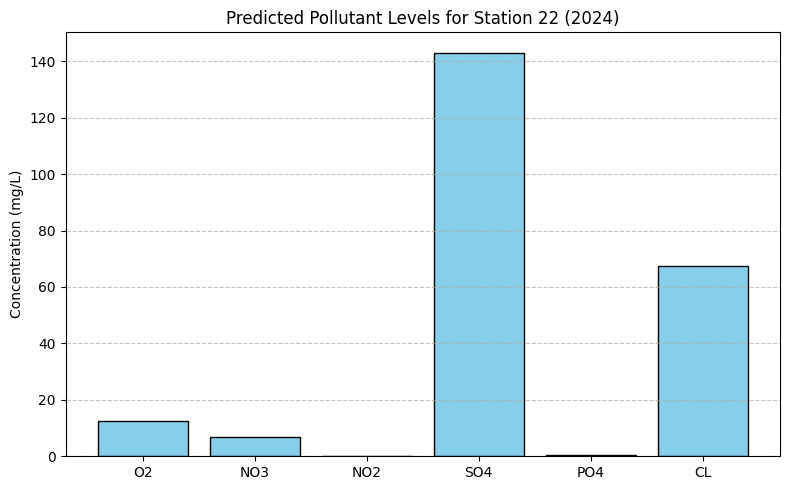

In [28]:
# Pollutants and their predicted values
pollutants = list(predicted_dict.keys())
values = list(predicted_dict.values())

# Bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(pollutants, values, color='skyblue', edgecolor='black')

# Highlight unsafe values (optional)
safe_limits = {
    'O2': ('>=', 5.0),
    'NO3': ('<=', 50.0),
    'NO2': ('<=', 3.0),
    'SO4': ('<=', 250.0),
    'PO4': ('<=', 5.0),
    'CL': ('<=', 250.0),
}

for bar, p in zip(bars, pollutants):
    value = predicted_dict[p]
    op, limit = safe_limits[p]
    if (op == '<=' and value > limit) or (op == '>=' and value < limit):
        bar.set_color('salmon')  # unsafe

plt.title(f"Predicted Pollutant Levels for Station {station_id} ({year_input})")
plt.ylabel("Concentration (mg/L)")
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [29]:
def evaluate_water_safety(station_id, year, pollutants):
    # Safe limits based on WHO/BIS standards
    safe_limits = {
        'O2': ('>=', 5.0, "Dissolved Oxygen too low"),
        'NO3': ('<=', 50.0, "Nitrate too high"),
        'NO2': ('<=', 3.0, "Nitrite too high"),
        'SO4': ('<=', 250.0, "Sulfate too high"),
        'PO4': ('<=', 5.0, "Phosphate too high"),
        'CL': ('<=', 250.0, "Chloride too high"),
    }

    result_lines = [f"*** Water Quality Analysis — Station {station_id} ({year}) ***\n"]
    is_safe = True
    reasons = []

    for pollutant, value in pollutants.items():
        if pollutant in safe_limits:
            op, limit, reason = safe_limits[pollutant]

            # Evaluate the condition
            if op == '<=' and value <= limit:
                result_lines.append(f"{pollutant}: {value:.2f} mg/L ->")
            elif op == '>=' and value >= limit:
                result_lines.append(f"{pollutant}: {value:.2f} mg/L ->")
            else:
                result_lines.append(f"{pollutant}: {value:.2f} mg/L ->")
                is_safe = False
                reasons.append(reason)
        else:
            result_lines.append(f"{pollutant}: {value:.2f} mg/L (No limit defined)")

    # Final verdict
    if is_safe:
        result_lines.append("\n [Final Verdict: SAFE for drinking]")
    else:
        result_lines.append("\n [Final Verdict: UNSAFE for drinking]")
        for reason in reasons:
            result_lines.append(f"  - {reason}")

    return "\n".join(result_lines)


In [30]:
report = evaluate_water_safety(station_id, year_input, predicted_dict)
print(report)


*** Water Quality Analysis — Station 22 (2024) ***

O2: 12.60 mg/L ->
NO3: 6.90 mg/L ->
NO2: 0.13 mg/L ->
SO4: 143.08 mg/L ->
PO4: 0.50 mg/L ->
CL: 67.33 mg/L ->

 [Final Verdict: SAFE for drinking]
